In [1]:
import dataset 
import seaborn as sns
import os
import numpy as np
import cv2
import pandas as pd


In [2]:
dataset.VIDEO_PATH="videos/"
dataset.DATASET_PATH="HW1_dataset/"

In [3]:
df=dataset.create_df("train",with_image_names=True)
df

,image,boxes,ImgName
0,"[[[0, 9, 9], [0, 8, 8], [0, 10, 12], [2, 14, 2...","[[2, 0.44565679257812496, 0.404519786875, 0.22...",P040_balloon1_2500
1,"[[[88, 113, 129], [89, 114, 130], [89, 114, 13...","[[5, 0.580750407890625, 0.5279891304166667, 0....",P019_balloon1_3236
2,"[[[0, 12, 14], [0, 12, 14], [0, 13, 12], [1, 1...","[[7, 0.64751075390625, 0.5221766277083333, 0.1...",P030_balloon1_6865
3,"[[[59, 85, 97], [58, 84, 96], [57, 83, 95], [5...","[[7, 0.82287056390625, 0.42083333802083334, 0....",P025_balloon1_4907
4,"[[[105, 119, 118], [106, 120, 119], [108, 122,...","[[7, 0.7694208650000001, 0.4862968402083333, 0...",P035_balloon1_1085
...,...,...,...
785,"[[[113, 119, 130], [114, 120, 131], [116, 122,...","[[5, 0.684484038671875, 0.5659653464583333, 0....",P036_balloon1_1951
786,"[[[57, 81, 87], [58, 82, 88], [59, 83, 89], [6...","[[7, 0.606767794609375, 0.6065225809375001, 0....",P024_balloon1_1518
787,"[[[61, 92, 101], [60, 91, 100], [57, 88, 97], ...","[[5, 0.7112561175, 0.5796195652083334, 0.17781...",P025_balloon1_3977
788,"[[[48, 72, 96], [49, 73, 97], [51, 75, 99], [5...","[[5, 0.6711210096093752, 0.5431930692708333, 0...",P027_balloon1_4255


In [37]:
s=df['boxes'].apply(lambda x: pd.Series(pd.Series(x)), 1).stack()
s.index = s.index.droplevel(-1)

bboxes_df=s.apply(pd.Series)
bboxes_df=bboxes_df.join(df["ImgName"])

In [38]:
bboxes_df=bboxes_df.reset_index()

bboxes_df.columns=["ImgId","label_index", "xcenter", "ycenter", "w", "h","ImgName"]
bboxes_df["label_index"]=bboxes_df["label_index"].apply(int)
bboxes_df["balloon"]= np.where(bboxes_df['ImgName'].str.contains(pat="ball"), True, False)


<AxesSubplot:xlabel='label_index', ylabel='Count'>

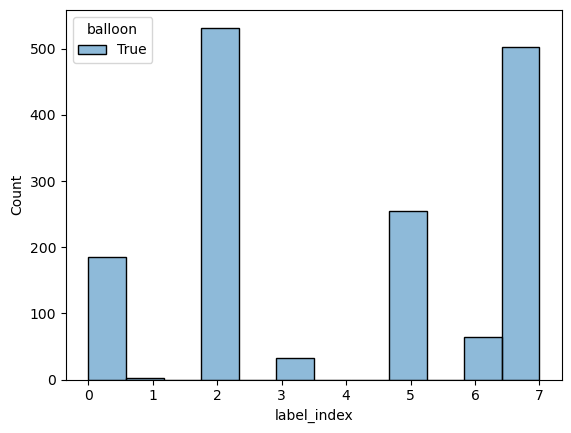

In [41]:
sns.histplot(data=bboxes_df, x="label_index",hue="balloon")


In [ ]:
bboxes_df.dropna(how="all").count(numeric_only=True)


ImgId          1574
label_index    1574
xcenter        1574
ycenter        1574
w              1574
h              1574
dtype: int64

no null values

In [ ]:
df2 = bboxes_df.groupby(['ImgId'])['ImgId'].count()

In [ ]:
df2.

ImgId
0      2
1      2
2      2
3      2
4      2
      ..
785    2
786    2
787    2
788    2
789    2
Name: ImgId, Length: 790, dtype: int64

In [ ]:
bboxes_df=pd.DataFrame(columns= ["imgId","label_index", "xcenter", "ycenter", "w", "h"])
bboxes_df

In [ ]:
cap = cv2.VideoCapture(VIDEO_PATH+'P023_tissue1.wmv')
# Check if camera opened successfully
if (cap.isOpened() == False):
    print("Error opening video stream or file")

Error opening video stream or file


In [ ]:
f = open("demofile.txt", "r")
